In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
data = pd.read_csv(r'C:\Users\thear\Documents\Data_Analytics_Projects\telecom_churn_analysis\Churn_Data.csv')
data.head()

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [65]:
data.fillna("Others", inplace = True)

In [66]:
data = data.drop(['customer_id', 'churn_category', 'churn_reason'], axis = 1)

In [67]:
print(data.columns)

Index(['gender', 'age', 'married', 'state', 'number_of_referrals',
       'tenure_in_months', 'value_deal', 'phone_service', 'multiple_lines',
       'internet_service', 'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charge',
       'total_charges', 'total_refunds', 'total_extra_data_charges',
       'total_long_distance_charges', 'total_revenue', 'customer_status'],
      dtype='object')


In [68]:
# List of columns to be label encoded (all lowercase)
columns_to_encode = [
    'gender', 'married', 'state', 'value_deal', 'phone_service', 'multiple_lines',
    'internet_service', 'internet_type', 'online_security', 'online_backup',
    'device_protection_plan', 'premium_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
    'payment_method'
]  # [#]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])  # [#]

# Manually encode the target variable 'customer_status'
data['customer_status'] = data['customer_status'].map({'Stayed': 0, 'Churned': 1})  # [#]

# Split data into features and target
X = data.drop('customer_status', axis=1)
y = data['customer_status']  # [#]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # [#]


In [69]:
#Traing the Random Forest Model
# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)

# Traing the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[788  50]
 [137 227]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       838
           1       0.82      0.62      0.71       364

    accuracy                           0.84      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



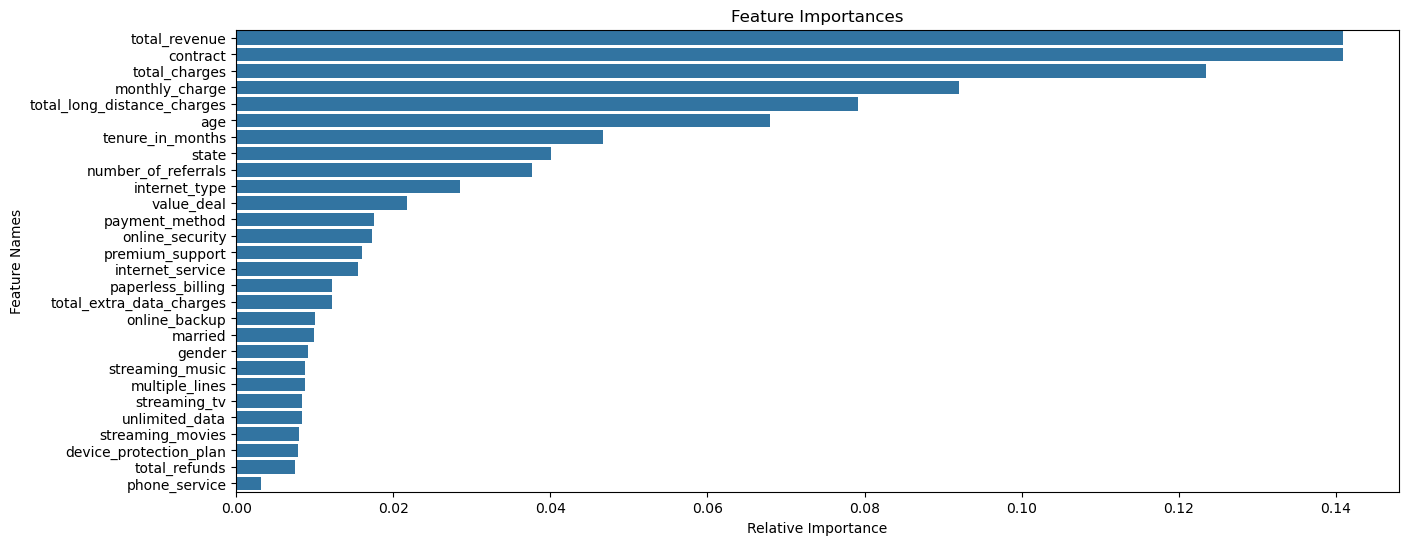

In [70]:
# Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [71]:
data2 = pd.read_csv(r'C:\Users\thear\Documents\Data_Analytics_Projects\telecom_churn_analysis\Joined_Data.csv')
data2.head()

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,Others,Others
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,Others,Others
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,Others,Others
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,Others,Others
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.05,33.7,0.0,0,3.62,37.32,Joined,Others,Others


In [73]:
# Make a separate copy of your input dataframe which has all columns including customer_id
original_data = data2.copy()

# Extract customer_id column
customer_ids = original_data['customer_id']

# Drop non-feature columns
encoded_data = original_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)

# Encode categorical columns with fallback for unseen labels
for column in encoded_data.select_dtypes(include=['object']).columns:
    # Fill NaN with 'Others'
    encoded_data[column] = encoded_data[column].fillna("Others")

    # Get the mapping from the fitted LabelEncoder
    le_mapping = dict(zip(label_encoders[column].classes_, range(len(label_encoders[column].classes_))))
    
    # Map using the LabelEncoder, unseen values including 'Others' will be assigned -1
    encoded_data[column] = encoded_data[column].map(le_mapping).fillna(-1).astype(int)

# Make predictions
new_predictions = rf_model.predict(encoded_data)

# Add predictions and customer_id to original_data
original_data['customer_status_predicted'] = new_predictions
original_data['customer_id'] = customer_ids.values

# Filter churned customers (predicted)
churned_customers = original_data[original_data['customer_status_predicted'] == 1]

# Save churned customer data to CSV
churned_customers.to_csv(r'C:\Users\thear\Documents\Data_Analytics_Projects\telecom_churn_analysis\churned_customers.csv', index=False)
